# Limpeza e qualidade de dados

Como exemplos, vamos trabalhar com o conjunto de dados sobre o navio Titanic. Esse é um conjunto de dados estruturado que é muito utilizado na introdução à análise de dados, à ciência de dados, à mineração de dados, etc. Portanto, há muito material e técnicas envolvendo esse conjunto como exemplo, o que facilita o aprendizado. Vamos ver como são os atributos desse dataset.

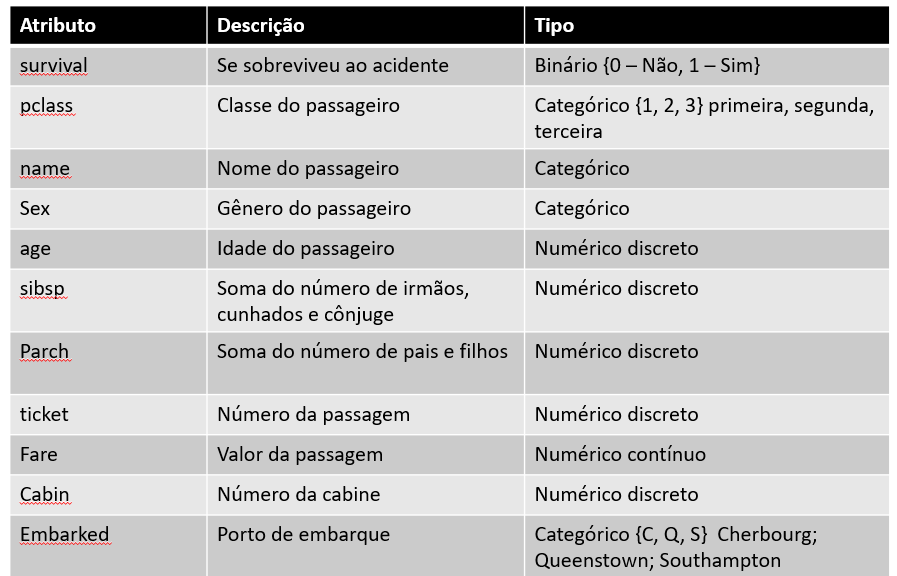

# 1. Carregamento dos dados para um Data Frame



In [1]:
import pandas as pd

df_titanic = pd.read_csv('../data/titanic_custom.csv')

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Detecção de duplicatas e de valores nulos

In [2]:
df_titanic.duplicated().sum()

np.int64(0)

In [3]:
print(df_titanic.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic2 = df_titanic.drop('Cabin', axis=1)
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [6]:
media_idade = df_titanic2['Age'].mean()
mediana_idade = df_titanic2['Age'].median()
print(media_idade)
print(mediana_idade)

29.839173669467783
28.0


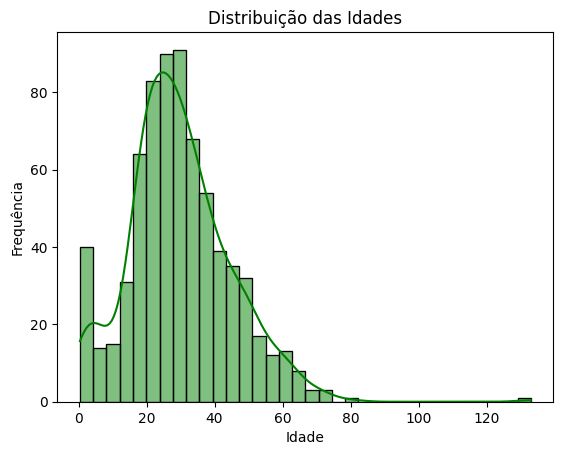

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_titanic2['Age'], color="green", kde=True)
plt.title("Distribuição das Idades")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

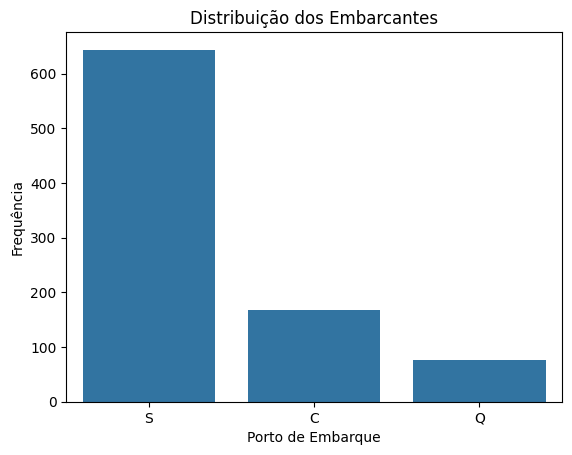

In [8]:
sns.countplot(x='Embarked', data=df_titanic2)
plt.title("Distribuição dos Embarcantes")
plt.xlabel("Porto de Embarque")
plt.ylabel("Frequência")
plt.show()

In [9]:
df_titanic2['Embarked'].fillna('S', inplace=True)
df_titanic2['Age'].fillna(df_titanic2['Age'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12036\2273959496.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic2['Embarked'].fillna('S', inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12036\2273959496.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [10]:
df_titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [11]:
df_titanic2.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.839174,0.523008,0.381594,37.234698
std,257.353842,0.486592,0.836071,13.454159,1.102743,0.806057,173.359298
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,-10.100000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.839174,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,133.000000,8.000000,6.000000,5012.329200


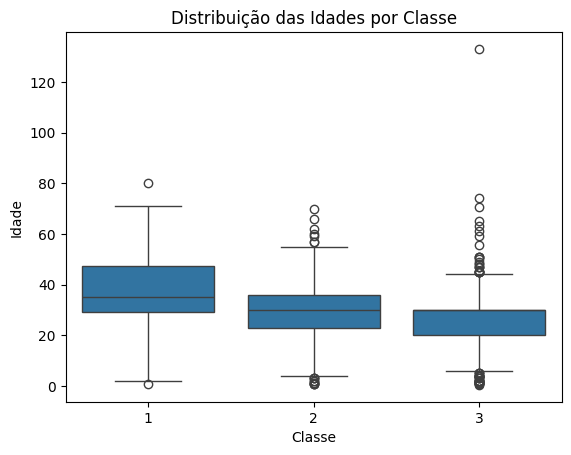

In [12]:
sns.boxplot(x='Pclass', y='Age', data=df_titanic2)
plt.title("Distribuição das Idades por Classe")
plt.xlabel("Classe")
plt.ylabel("Idade")
plt.show()

In [13]:
print(df_titanic2.sort_values(by='Age', ascending=False).head(10))

     PassengerId  Survived  Pclass                                  Name  \
103          104         0       3            Johansson, Mr. Gustaf Joel   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   
493          494         0       1               Artagaveytia, Mr. Ramon   
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
745          746         0       1          Crosby, Capt. Edward Gifford   
672          673         0       2           Mitchell, Mr. Henry Michael   
33            34         0       2                 Wheadon, Mr. Edward H   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   

      Sex    Age  SibSp  Parch      Ticket     Fare Embarked  
103  male  133.0      0      0        7540   8.6542        S  
630  male   80.0      0      0       

In [14]:
df_titanic2.loc[df_titanic2['Age'] == 133, 'Age'] = mediana_idade

In [15]:
print(df_titanic2.sort_values(by='Age', ascending=False).head(10))

     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
851          852         0       3                   Svensson, Mr. Johan   
96            97         0       1             Goldschmidt, Mr. George B   
493          494         0       1               Artagaveytia, Mr. Ramon   
116          117         0       3                  Connors, Mr. Patrick   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
33            34         0       2                 Wheadon, Mr. Edward H   
456          457         0       1             Millet, Mr. Francis Davis   
54            55         0       1        Ostby, Mr. Engelhart Cornelius   

      Sex   Age  SibSp  Parch      Ticket     Fare Embarked  
630  male  80.0      0      0       27042  30.0000        S  
851  male  74.0      0      0      3470